# <center>  Principal Component Analysis and Boosting - 04/11/2020</center> #

* <span style="color:red">Cours</span>            : MICAS911-Introduction-To-Statistic-Learning
* <span style="color:red">Auteur</span>           : Bournhar Abdelaziz
* <span style="color:red">Auteur</span>           : Panongbene Jean Mohamed Sawadogo
* <span style="color:red">Auteur</span>           : Yu Yeh

# <center> <span style="color:red"><font size="+3"> Principal Component Analysis and Boosting </font></span> </center> #



In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.datasets import mnist # load mnist data
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_hastie_10_2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
%matplotlib inline

# I. PCA for dimensionality reduction and image denoising

## Load Data

In [3]:
#load the data
(mnist_X_train, mnist_Y_train), (mnist_X_test, mnist_Y_test) = mnist.load_data()

In [4]:
print("Dimension Training Data   = ", mnist_X_train.shape)
print("Dimension Testing Data    = ", mnist_X_test.shape)

Dimension Training Data   =  (60000, 28, 28)
Dimension Testing Data    =  (10000, 28, 28)


## Data Preprocessing

In [5]:
# tampon value
tampon = np.arange(2000)

# build the 2000 sample
X_dataset_2000 = mnist_X_test[tampon]
Y_dataset_2000 = mnist_Y_test[tampon]

# Vectorize and normalization
X_dataset_2000 = X_dataset_2000.reshape(X_dataset_2000.shape[0], -1)/255#np.ravel(X_dataset_2000, 2)

# compute  normalization
X_dataset_2000 = X_dataset_2000 - np.mean(X_dataset_2000,0)

In [6]:
print("Dimension Image Data After Preprocessing     = ", X_dataset_2000.shape)
print("Dimension Label Image After Preprocessing    = ", Y_dataset_2000.shape)

Dimension Image Data After Preprocessing     =  (2000, 784)
Dimension Label Image After Preprocessing    =  (2000,)


## Useful function

In [7]:
def pca_decomposition(dataset, dimension_reduce):
    """This function takes as input a set of data which is represented as an array n*d and an integer q<=d. 
    It then returned the PCA matrix of dimension d * q and the q largest eigenvalues."""
    
    if(dataset.shape[1]<dimension_reduce):
        print("Errors : Bad dimension")
        return -1
    
    
    # the Eigendecomposition matrix
    eigendecomposition = np.dot(dataset.T,dataset)
    
    # compute eigen_values and eigen_vectors values
    eigen_values, eigen_vectors = np.linalg.eig(eigendecomposition)
    
    eigen_values_ = list()
    
    # Build the eigen values
    for i in range(dimension_reduce):
        eigen_values_.append(eigen_values[i])
    
    # Build the PCA Matrix
    matrice_PCA_ = eigen_vectors[: , :dimension_reduce]# to delete
        
    return matrice_PCA_, np.array(eigen_values_), np.sum(eigen_values_)/np.sum(eigen_values), np.array(eigen_vectors), np.array(eigen_values) 
#--------------------------------------------------------------------------------------------------------------------------------------------------------#
def reduce_dimension(dataset, matrice_PCA_):
    """This function performs a dimension reduction with a PCA matrix"""
    
    return np.dot(dataset, matrice_PCA_)
#--------------------------------------------------------------------------------------------------------------------------------------------------------#
def recover_matrix(dataset, matrice_PCA_):
    """This function recove the input data by the PCA transformation"""
    
    return np.dot(dataset, matrice_PCA_.T)
#--------------------------------------------------------------------------------------------------------------------------------------------------------#
def plot_image_different_axe(vector_image, id_image_plot, reshape_x, reshape_y):
    """Use this function for plot data"""
    
    fig=plt.figure(figsize=(10, 10))
    for i in range(len(id_image_plot)):
        fig.add_subplot(1, len(id_image_plot), i+1)
        plt.imshow(vector_image[id_image_plot[i]][0:reshape_x*reshape_y].real.reshape(reshape_x,reshape_y))
    plt.show()
#--------------------------------------------------------------------------------------------------------------------------------------------------------#


## Question 1 :

In [8]:
# Build the different element of PCA for dimension 100
matrice_PCA_, eigen_values_PCA , percentage_explicated, eigen_vectors, eigen_values =  pca_decomposition(X_dataset_2000, 100)

In [9]:
#compute the cumulative sum of these percentage
percentage_explicated_per_dimension = list()

for i in range(eigen_values.shape[0]):
    percentage_explicated_per_dimension.append(np.sum(eigen_values[0:i+1])/np.sum(eigen_values))

/home/panongbene/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


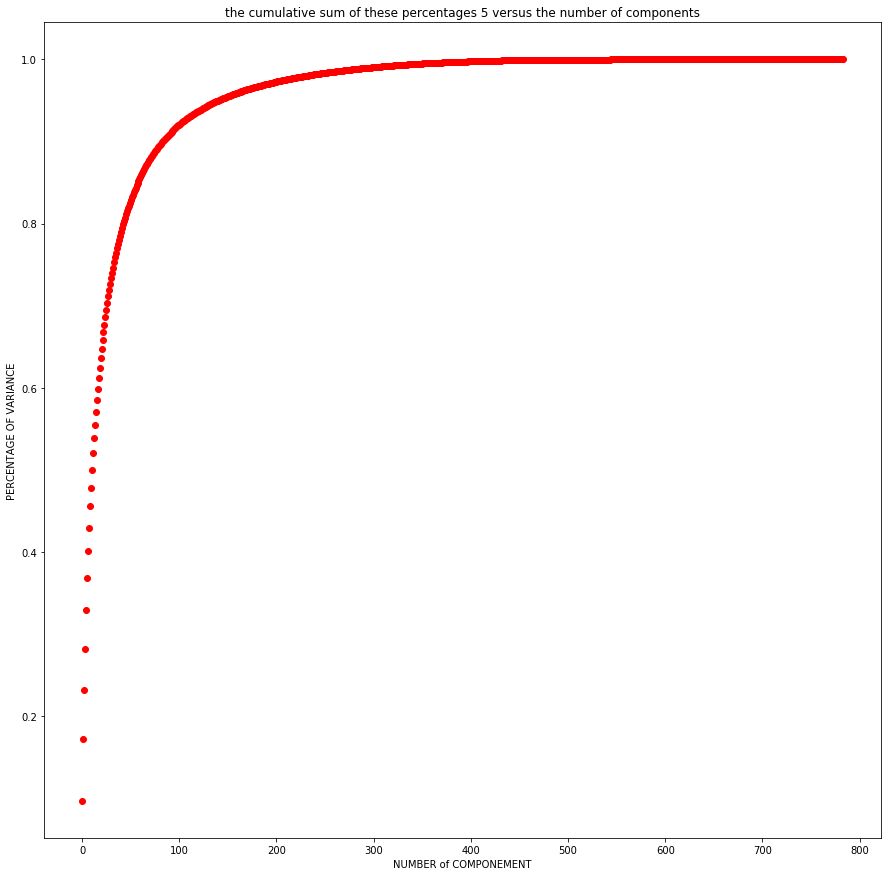

In [10]:
# Plot the cumulative sum versus number the number of componement
number_componement = np.arange(eigen_values.shape[0])

plt.figure(figsize=(15,15))
# Area plot
plt.xlabel('NUMBER of COMPONEMENT')
plt.ylabel('PERCENTAGE OF VARIANCE')
plt.title('the cumulative sum of these percentages 5 versus the number of components')
#plt.fill_between(number_componement, percentage_explicated_per_dimension, alpha=1, color='b')
plt.plot(number_componement, percentage_explicated_per_dimension, 'bo', alpha=1, color='red')
plt.show()

## Question 2 :

In [11]:
def compute_error_with_frobenius_nurm(real_data_set, recover_data_set):
    """This function compute the normalized reconstruction error with the Frobenius norm,"""
    
    norm_real_recover = np.linalg.norm(real_data_set-recover_data_set, 'fro')
    
    norm_real = np.linalg.norm(real_data_set, 'fro')
    
    return norm_real_recover/norm_real

### For P = 50

In [12]:
# Build the different element of PCA for dimension 50
matrice_PCA_50, eigen_values_PCA_50 , percentage_explicated_50, eigen_vectors_50, eigen_values_50 =  pca_decomposition(X_dataset_2000, 50)

In [13]:
# We compute the dataset obtained by PCA
dataset_obtain_after_pca_50  = reduce_dimension(X_dataset_2000, matrice_PCA_50)

In [14]:
# We compute the recover data set
recover_data_set_50 = recover_matrix(dataset_obtain_after_pca_50, matrice_PCA_50)

In [15]:
# We compute the frobenius normalized error
error_p_50 = compute_error_with_frobenius_nurm(X_dataset_2000, recover_data_set_50)

In [16]:
# The error 
print("the normalized reconstruction error == ", error_p_50)

the normalized reconstruction error ==  0.41776441093516464


 In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with dimension reduction for P=50


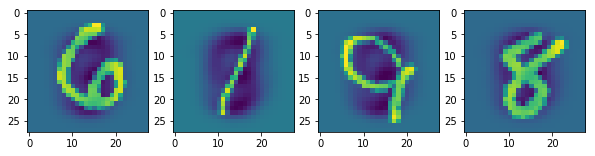

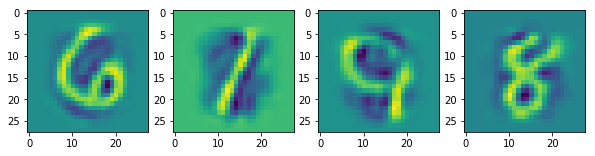

In [17]:
# Visualization some recovered image
data_plot = np.random.randint(1, X_dataset_2000.shape[0], 4)
print(" In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with dimension reduction for P=50")
plot_image_different_axe(X_dataset_2000, data_plot, 28, 28)
plot_image_different_axe(recover_data_set_50, data_plot, 28, 28)

### For P = 250

In [18]:
# Build the different element of PCA for dimension 250
matrice_PCA_250, eigen_values_PCA_250 , percentage_explicated_250, eigen_vectors_250, eigen_values_250 =  pca_decomposition(X_dataset_2000, 250)

In [19]:
# We compute the dataset obtained by PCA
dataset_obtain_after_pca_250  = reduce_dimension(X_dataset_2000, matrice_PCA_250)

In [20]:
# We compute the recover data set
recover_data_set_250 = recover_matrix(dataset_obtain_after_pca_250, matrice_PCA_250)

In [21]:
# We compute the frobenius normalized error
error_p_250 = compute_error_with_frobenius_nurm(X_dataset_2000, recover_data_set_250)

In [22]:
# The error 
print("the normalized reconstruction error == ", error_p_250)

the normalized reconstruction error ==  0.12838961778054975


 In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with dimension reduction for P=250


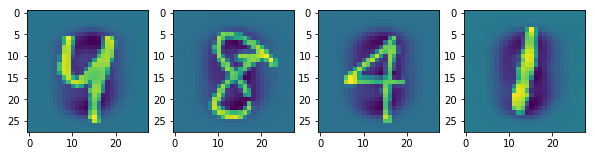

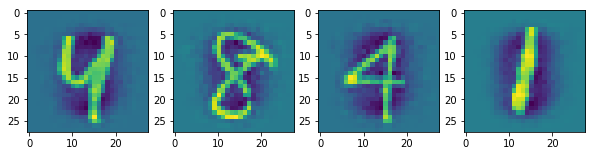

In [23]:
# Visualization some recovered image
data_plot = np.random.randint(1, X_dataset_2000.shape[0], 4)
print(" In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with dimension reduction for P=250")

plot_image_different_axe(X_dataset_2000, data_plot, 28, 28)
plot_image_different_axe(recover_data_set_250, data_plot, 28, 28)

### For P = 500

In [24]:
# Build the different element of PCA for dimension 500
matrice_PCA_500, eigen_values_PCA_500 , percentage_explicated_500, eigen_vectors_500, eigen_values_500 =  pca_decomposition(X_dataset_2000, 500)

In [25]:
# We compute the dataset obtained by PCA
dataset_obtain_after_pca_500  = reduce_dimension(X_dataset_2000, matrice_PCA_500)

In [26]:
# We compute the recover data set
recover_data_set_500 = recover_matrix(dataset_obtain_after_pca_500, matrice_PCA_500)

In [27]:
# We compute the frobenius normalized error
error_p_500 = compute_error_with_frobenius_nurm(X_dataset_2000, recover_data_set_500)

In [28]:
# The error 
print("the normalized reconstruction error == ", error_p_500)

the normalized reconstruction error ==  0.016041542269835302


 In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with dimension reduction for P=500


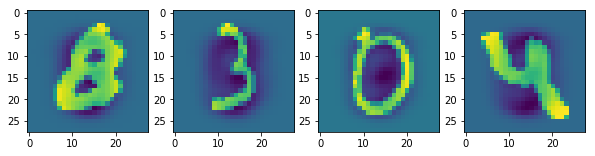

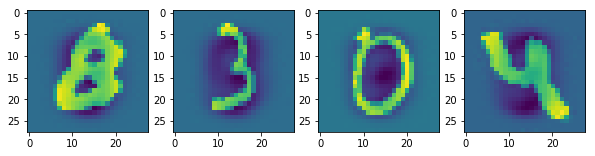

In [29]:
# Visualization some recovered image
data_plot = np.random.randint(1, X_dataset_2000.shape[0], 4)
print(" In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with dimension reduction for P=500")

plot_image_different_axe(X_dataset_2000, data_plot, 28, 28)
plot_image_different_axe(recover_data_set_500, data_plot, 28, 28)

#### Comment :

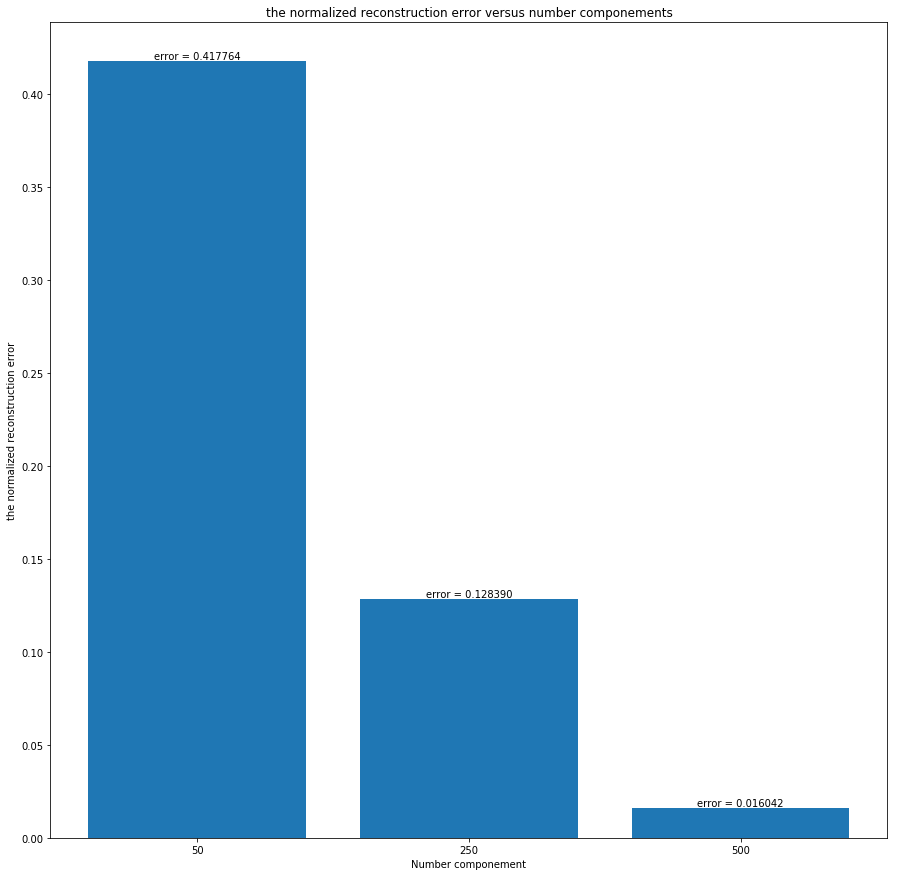

In [30]:
plt.figure(figsize=(15,15))

k_value = ["50","250","500"]
    
accuracy = [error_p_50, error_p_250, error_p_500]
unit = accuracy
 
plot = plt.bar(k_value, accuracy)
 
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2., height,'error = %f' % height, ha='center', va='bottom')
 
plt.title("the normalized reconstruction error versus number componements")
plt.xlabel('Number componement')
plt.ylabel('the normalized reconstruction error')
 
# show the graph
plt.show()

####  When reducing the number of components, the transformation error increases: we can therefore say that reducing the number of components leads to a loss of information

## Question 3 : 

In [31]:
# Creation of a Gaussian noise matrix with variance sigma=0.25 of size 2000 * 784
Gaussian_noise = np.random.normal(0, 0.25, (2000, X_dataset_2000.shape[1]))

In [32]:
# Image with gaussian noise with variance sigma=0.25
X_dataset_2000_with_noise = X_dataset_2000+Gaussian_noise

 In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with gaussian noise'


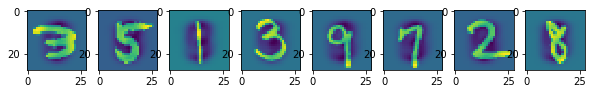

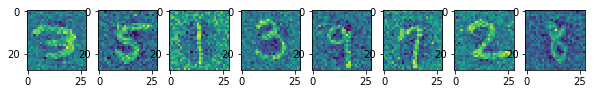

---------------------------------------------------------------------------------------------------------------
 In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with gaussian noise'


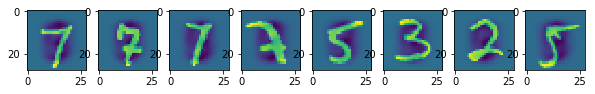

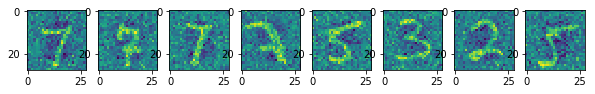

In [33]:
# Visualization some recovered image
data_plot = np.random.randint(1, X_dataset_2000.shape[0], 8)
print(" In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with gaussian noise'")
plot_image_different_axe(X_dataset_2000, data_plot, 28, 28)
plot_image_different_axe(X_dataset_2000_with_noise, data_plot, 28, 28)
print("---------------------------------------------------------------------------------------------------------------")
data_plot = np.random.randint(1, X_dataset_2000.shape[0], 8)
print(" In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with gaussian noise'")
plot_image_different_axe(X_dataset_2000, data_plot, 28, 28)
plot_image_different_axe(X_dataset_2000_with_noise, data_plot, 28, 28)

#### Comment : We see that by adding Gaussian noise the image becomes blurred

In [34]:
# Build the different element of PCA for dimension 100
matrice_PCA_, eigen_values_PCA , percentage_explicated, eigen_vectors, eigen_values =  pca_decomposition(X_dataset_2000, 100)

In [35]:
# Build the different element of PCA for dimension 100
matrice_PCA_noise, eigen_values_PCA_noise , percentage_explicated_noise, eigen_vectors_noise, eigen_values_noise =  pca_decomposition(X_dataset_2000_with_noise, 100)

In [36]:
#compute the cumulative sum of these percentage
percentage_explicated_per_dimension = list()

for i in range(eigen_values.shape[0]):
    percentage_explicated_per_dimension.append(np.sum(eigen_values[0:i+1])/np.sum(eigen_values))
    
#compute the cumulative sum of these percentage case with noise
percentage_explicated_per_dimension_noise = list()

for i in range(eigen_values_noise.shape[0]):
    percentage_explicated_per_dimension_noise.append(np.sum(eigen_values_noise[0:i+1])/np.sum(eigen_values_noise))

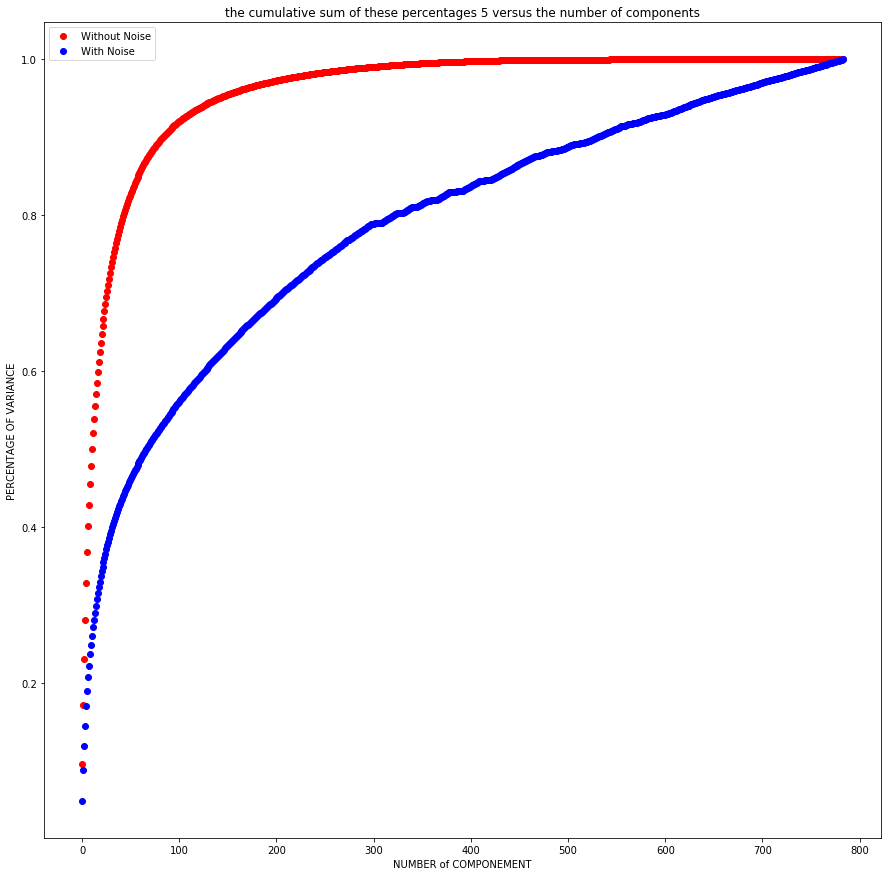

In [37]:
# Plot the cumulative sum versus number the number of componement
number_componement = np.arange(eigen_values_noise.shape[0])

plt.figure(figsize=(15,15))
# Area plot
plt.xlabel('NUMBER of COMPONEMENT')
plt.ylabel('PERCENTAGE OF VARIANCE')
plt.title('the cumulative sum of these percentages 5 versus the number of components')
#plt.fill_between(number_componement_noise, percentage_explicated_per_dimension_noise, alpha=1, color='b')
plt.plot(number_componement, percentage_explicated_per_dimension, 'bo', alpha=1, color='red', label="Without Noise")
plt.plot(number_componement, percentage_explicated_per_dimension_noise, 'bo', alpha=1, color='b', label="With Noise")

plt.legend()
plt.show()

#### Comment : The variance explained in the case of images with Gaussian noise increases more slowly than the variance explained in the case without Gaussian noise. We can deduce that the noise reduces the performance of our PCA.

## Question 4 :

#### For sigma = 0.15

In [38]:
# Creation of a Gaussian noise matrix with variance sigma=0.25 of size 2000 * 784
Gaussian_noise_015 = np.random.normal(0, 0.15, (2000, X_dataset_2000.shape[1]))

In [39]:
# Image with gaussian noise with variance sigma=0.15
X_dataset_2000_with_noise_015 = X_dataset_2000+Gaussian_noise_015

In [40]:
# Build the different element of PCA for dimension 250
matrice_PCA_noise_015, eigen_values_PCA_noise_015 , percentage_explicated_noise_015, eigen_vectors_015, eigen_values_noise_015 =  pca_decomposition(X_dataset_2000_with_noise_015, 250)

In [41]:
# We compute the dataset obtained by PCA
dataset_obtain_after_pca_015  = reduce_dimension(X_dataset_2000_with_noise_015, matrice_PCA_noise_015)

In [42]:
# We compute the recover data set
recover_data_set_015 = recover_matrix(dataset_obtain_after_pca_015, matrice_PCA_noise_015)

 In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with gaussian noise sigma = 0.15


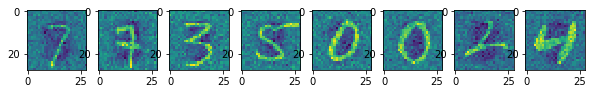

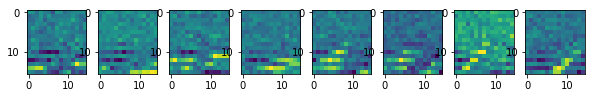

---------------------------------------------------------------------------------------------------------------
 In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with gaussian noise sigma = 0.15


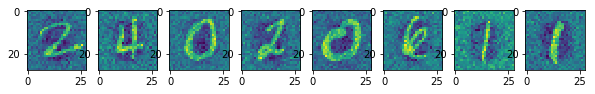

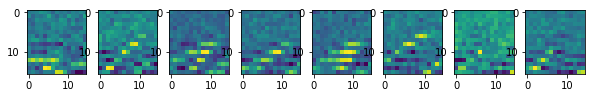

In [43]:
# Visualization some recovered image
data_plot = np.random.randint(1, X_dataset_2000_with_noise_015.shape[0], 8)
print(" In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with gaussian noise sigma = 0.15")
plot_image_different_axe(X_dataset_2000_with_noise_015, data_plot, 28, 28)
plot_image_different_axe(recover_data_set_015, data_plot, 16, 15)
print("---------------------------------------------------------------------------------------------------------------")
data_plot = np.random.randint(1, X_dataset_2000_with_noise_015.shape[0], 8)
print(" In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with gaussian noise sigma = 0.15")
plot_image_different_axe(X_dataset_2000_with_noise_015, data_plot, 28, 28)
plot_image_different_axe(recover_data_set_015, data_plot, 16, 15)

In [44]:
# We compute the frobenius normalized error
error_p_015 = compute_error_with_frobenius_nurm(X_dataset_2000, recover_data_set_015)

In [45]:
# The error 
print("the normalized reconstruction error == ", error_p_015)

the normalized reconstruction error ==  0.456345274566465


#### For sigma = 0.25

In [46]:
# Creation of a Gaussian noise matrix with variance sigma=0.25 of size 2000 * 784
Gaussian_noise_025 = np.random.normal(0, 0.25, (2000, X_dataset_2000.shape[1]))

In [47]:
# Image with gaussian noise with variance sigma=0.25
X_dataset_2000_with_noise_025 = X_dataset_2000+Gaussian_noise_025

In [48]:
# Build the different element of PCA for dimension 250
matrice_PCA_noise_025, eigen_values_PCA_noise_025 , percentage_explicated_noise_025, eigen_vectors_025, eigen_values_noise_025 =  pca_decomposition(X_dataset_2000_with_noise_025, 250)

In [49]:
# We compute the dataset obtained by PCA
dataset_obtain_after_pca_025  = reduce_dimension(X_dataset_2000_with_noise_025, matrice_PCA_noise_025)

In [50]:
# We compute the recover data set
recover_data_set_025 = recover_matrix(dataset_obtain_after_pca_025, matrice_PCA_noise_025)

 In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with gaussian noise sigma = 0.25


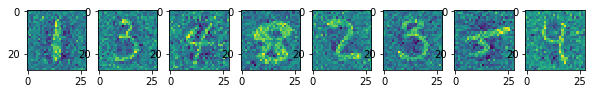

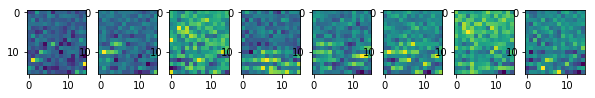

---------------------------------------------------------------------------------------------------------------
 In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with gaussian noise sigma = 0.25


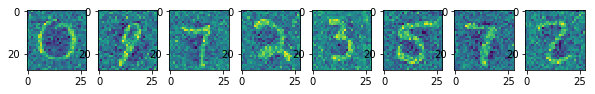

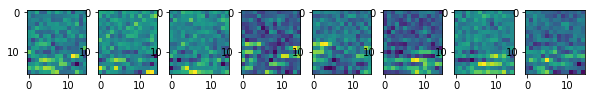

In [51]:
# Visualization some recovered image
data_plot = np.random.randint(1, X_dataset_2000_with_noise_025.shape[0], 8)
print(" In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with gaussian noise sigma = 0.25")
plot_image_different_axe(X_dataset_2000_with_noise_025, data_plot, 28, 28)
plot_image_different_axe(recover_data_set_025, data_plot, 16, 15)
print("---------------------------------------------------------------------------------------------------------------")
data_plot = np.random.randint(1, X_dataset_2000_with_noise_025.shape[0], 8)
print(" In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with gaussian noise sigma = 0.25")
plot_image_different_axe(X_dataset_2000_with_noise_025, data_plot, 28, 28)
plot_image_different_axe(recover_data_set_025, data_plot, 16, 15)

In [52]:
# We compute the frobenius normalized error
error_p_025 = compute_error_with_frobenius_nurm(X_dataset_2000, recover_data_set_025)

In [53]:
# The error 
print("the normalized reconstruction error == ", error_p_025)

the normalized reconstruction error ==  0.7560296075879811


#### For sigma = 0.50

In [54]:
# Creation of a Gaussian noise matrix with variance sigma=0.25 of size 2000 * 784
Gaussian_noise_050 = np.random.normal(0, 0.50, (2000, X_dataset_2000.shape[1]))

In [55]:
# Image with gaussian noise with variance sigma=0.50
X_dataset_2000_with_noise_050 = X_dataset_2000+Gaussian_noise_050

In [56]:
# Build the different element of PCA for dimension 250
matrice_PCA_noise_050, eigen_values_PCA_noise_050 , percentage_explicated_noise_050, eigen_vectors_050, eigen_values_noise_050 =  pca_decomposition(X_dataset_2000_with_noise_050, 250)

In [57]:
# We compute the dataset obtained by PCA
dataset_obtain_after_pca_050  = reduce_dimension(X_dataset_2000, matrice_PCA_noise_050)

In [58]:
# We compute the recover data set
recover_data_set_050 = recover_matrix(dataset_obtain_after_pca_050, matrice_PCA_noise_050)

 In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with gaussian noise sigma = 0.50


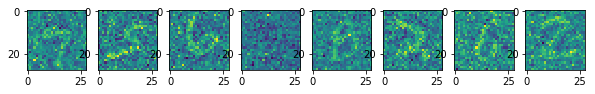

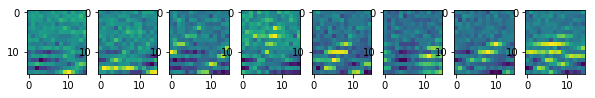

---------------------------------------------------------------------------------------------------------------
 In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with gaussian noise sigma = 0.50


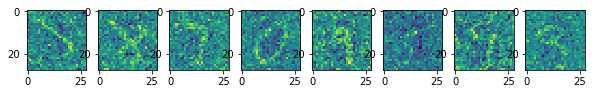

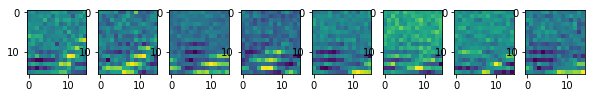

In [59]:
# Visualization some recovered image
data_plot = np.random.randint(1, X_dataset_2000_with_noise_050.shape[0], 8)
print(" In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with gaussian noise sigma = 0.50")
plot_image_different_axe(X_dataset_2000_with_noise_050, data_plot, 28, 28)
plot_image_different_axe(recover_data_set_050, data_plot, 16, 15)
print("---------------------------------------------------------------------------------------------------------------")
data_plot = np.random.randint(1, X_dataset_2000_with_noise_050.shape[0], 8)
print(" In the first line, we have the images without dimension reduction and in the second line we have the images corresponding with gaussian noise sigma = 0.50")
plot_image_different_axe(X_dataset_2000_with_noise_050, data_plot, 28, 28)
plot_image_different_axe(recover_data_set_050, data_plot, 16, 15)

In [60]:
# We compute the frobenius normalized error
error_p_050 = compute_error_with_frobenius_nurm(X_dataset_2000, recover_data_set_050)

In [61]:
# The error 
print("the normalized reconstruction error == ", error_p_050)

the normalized reconstruction error ==  0.41639096001874426


#### Comment :

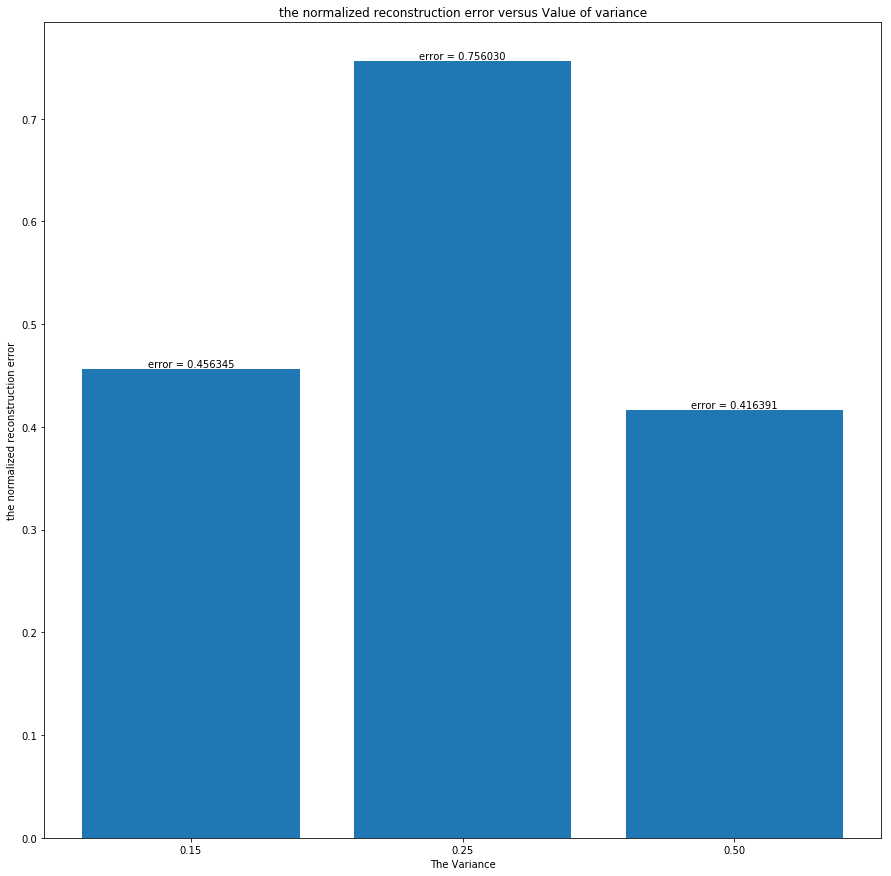

In [62]:
plt.figure(figsize=(15,15))

k_value = ["0.15","0.25","0.50"]
    
accuracy = [error_p_015, error_p_025, error_p_050]
unit = accuracy
 
plot = plt.bar(k_value, accuracy)
 
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2., height,'error = %f' % height, ha='center', va='bottom')
 
plt.title("the normalized reconstruction error versus Value of variance")
plt.xlabel('The Variance')
plt.ylabel('the normalized reconstruction error')
 
# show the graph
plt.show()

#### the normalized reconstruction error describes a Gaussian curve centered in sigma = 0.25 with respect to the variance used to generate the noise

# II. AdaBoost: Building A Strong Learner from Weak Learners

AdaBoost algorithm for a two-class classification problem. The algorithm sequentially applies a weak classification to modified versions of the data. By increasing the weights of the missclassified observations, each weak learner focuses on the error of the previous one. The predictions are aggregated through a weighted majority vote.

## Helpers Functions

In [64]:
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
            color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of iterations', fontsize = 12)
    plot1.set_xticklabels(range(0,450,50))
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of iterations', fontsize = 16)
    plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')
    plt.savefig('adaboost.pdf',format='pdf')

In [65]:
def get_error_rate(pred, Y):
    return sum(pred != Y) / float(len(Y))

In [66]:
def print_error_rate(err):
    print('Error rate: Training: %.4f - Test: %.4f'.format(err))

## Weak Learners

In [67]:
def generic_clf(Y_train, X_train, Y_test, X_test, clf):
    clf.fit(X_train,Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return get_error_rate(pred_train, Y_train),get_error_rate(pred_test, Y_test)

# Datasets :
##### Generates data for binary classification used in Hastie et al. 2009, Example 10.2.

In [68]:
# Read data
x, y = make_hastie_10_2()
df = pd.DataFrame(x)
df['Y'] = y

# Split into training and test set
train, test = train_test_split(df, test_size = 0.2)
X_train, Y_train = train.iloc[:,:-1], train.iloc[:,-1]
X_test, Y_test = test.iloc[:,:-1], test.iloc[:,-1]

In [69]:
# Fit a simple decision tree first
clf_tree = DecisionTreeClassifier(max_depth = 1, random_state = 1)
er_tree = generic_clf(Y_train, X_train, Y_test, X_test, clf_tree)
print('Single Weak Learner Achieves \n Train Error of {} \n Test Error of {}'.format(er_tree[0],er_tree[1]))

Single Weak Learner Achieves 
 Train Error of 0.4586458333333333 
 Test Error of 0.4841666666666667


# Implement an adaboost classifier

In [70]:
def adaboost_clf(Y_train, X_train, Y_test, X_test, M, clf):
    n_train, n_test = len(X_train), len(X_test)
    # Initialize weights
    w = np.ones(n_train) / n_train # uniform distribution over the weights
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    
    for i in range(M):
        # Fit a classifier with the specific weights
        clf.fit(X_train, Y_train, sample_weight = w)
        pred_train_i = clf.predict(X_train)
        pred_test_i = clf.predict(X_test)
        
        y = Y_train.to_numpy()

        # Indicator function
        miss = np.sum(pred_test_i != Y_test)
        err_m = 0
        
        # Error
        for j in range(len(pred_train_i)):
            missed = 0
            if pred_train_i[j] != y[j] :
                missed = 1 
            err_m = err_m + w[j]*missed
        err_m = err_m/np.sum(w)
        
        
        # Equivalent with 1/-1 to update weights
        miss2 = 0
        
        # Alpha
        if np.absolute(np.log((1-err_m)/err_m)) < np.finfo(float).eps :
            alpha_m = np.finfo(float).eps
        else :
            alpha_m = np.log((1-err_m)/err_m)
            
        # New weights
        for j in range(len(w)):
            missed = 0
            if pred_train_i[j] != y[j] :
                missed = 1 
            w[j] = w[j]*np.exp(alpha_m*missed)
        
        # Add to prediction
        pred_train = [sum(x) for x in zip(pred_train, 
                                          [x * alpha_m for x in pred_train_i])]
        pred_test = [sum(x) for x in zip(pred_test, 
                                         [x * alpha_m for x in pred_test_i])]
    
    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    # Return error rate in train and test set
    #print(w)
    return get_error_rate(pred_train, Y_train), get_error_rate(pred_test, Y_test)

# Fit Adaboost classifier using a decision tree as base estimator

100%|██████████| 39/39 [07:41<00:00, 11.82s/it]


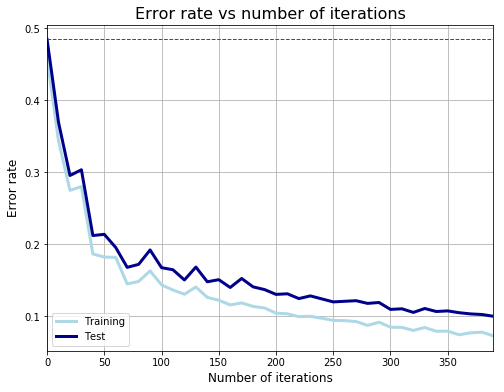

In [71]:
# Test with different number of iterations
er_train, er_test = [er_tree[0]], [er_tree[1]]
x_range = range(10, 400, 10)
for i in tqdm(x_range):
    er_i = adaboost_clf(Y_train, X_train, Y_test, X_test, i, clf_tree)
    er_train.append(er_i[0])
    er_test.append(er_i[1])
    
# Compare error rate vs number of iterations
plot_error_rate(er_train, er_test)